# Lập trình thống kê cơ bản

# Bài 4: Phương sai

### BS. Lê Ngọc Khả Nhi

Chào các bạn, trong bài thứ 4 của series "Lập trình thống kê cơ bản" với ngôn ngữ Python, chúng ta sẽ tìm hiểu nhiều cách khác nhau để ước tính phương sai của một biến ngẫu nhiên, bao gồm code thủ công.

Phương sai là một trị số thống kê nhằm đo lường mức độ phân tán của một biến ngẫu nhiên. Nói cách khác, ta muốn ước tính xem các giá trị của biến này nằm cách giá trị kỳ vọng (trung bình) bao xa. Phương sai được định nghĩa như "trung bình của bình phương sai biệt giữa của mỗi điểm dữ liệu và trung bình số học". 

lưu ý là ở đây ta đang nói về phương sai mẫu, chứ không phải của tổng thể, sự khác biệt nằm ở cách tính trung bình, với phương sai mẫu thì ta chia tổng bình phương sai số cho (N-1) với N là tổng số phần tử trong mẫu

$\sigma ^{2} = \frac{1}{(N - 1)} \sum_{i=1}^{N}\left (x_{i} - \bar{x}\right )^{2}$

Để minh họa, ta lấy một biến ngẫu nhiên X = giá trị pH của nước tiểu khảo sát trên 79 bệnh nhân:

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns

C:\Users\bacsi\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/boot/urine.csv', index_col=0)

x = np.array(df.ph.values)

x

array([4.91, 5.74, 7.2 , 5.51, 6.52, 5.27, 5.62, 5.67, 5.41, 6.13, 6.19,
       5.53, 7.12, 5.35, 5.21, 4.9 , 6.63, 6.81, 6.88, 6.14, 6.3 , 5.47,
       7.38, 5.96, 5.68, 6.76, 7.61, 6.61, 5.87, 5.44, 7.92, 5.98, 6.56,
       5.94, 5.85, 5.66, 6.4 , 6.35, 6.37, 6.18, 5.33, 5.64, 6.79, 5.97,
       5.68, 5.94, 5.77, 5.6 , 5.53, 5.36, 5.16, 5.86, 6.27, 7.01, 6.21,
       6.13, 5.73, 7.94, 6.28, 5.56, 5.71, 6.19, 5.24, 5.58, 5.98, 5.58,
       5.9 , 6.75, 6.9 , 6.29, 4.76, 5.4 , 5.14, 5.09, 7.9 , 4.81, 5.4 ,
       6.81, 6.03])

In [3]:
len(x) # N = 79

79

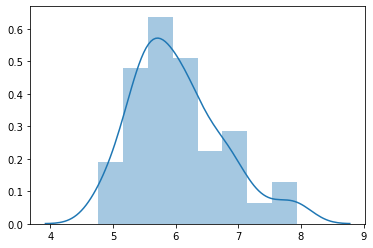

In [4]:
sns.distplot(x)

Theo định nghĩa, ta thấy rằng để ước tính phương sai (Var) của x, ta cần xác định những yếu tố sau:

1) Trung bình số học của X, các bạn có thể tham khảo bài số 1 trong Series này:

https://nbviewer.jupyter.org/github/kinokoberuji/Statistics-Python-Tutorials/blob/master/SP_101%20Means.ipynb

2) Cỡ mẫu: N, có thể tạo ra dễ dàng bằng hàm len()

Từ đây, ta có thể đi đến đích bằng ít nhất 3 con đường:

## Cách 1

Tạo list tất cả bình phương sai số, sau đó lấy tổng bằng hàm sum, rồi chia cho (N-1):

Có thể làm việc này bằng 1 vòng lặp for và append kết quả vào list rỗng

In [5]:
def samp_var_1(x):
    n = len(x)
    mu = sum(x) / n
    s=[]
    for i in x:
        s.append((i-mu)**2)
    return sum(s)/(n - 1)

In [6]:
samp_var_1(x)

0.5246207400194743

## Cách 2:

Cách này ta rút ngắn con đường bằng cách đi trực tiếp từ tổng bình phương sai số (ss)
Trước hết khởi tạo object ss có giá trị = 0;
Dùng 1 vòng lặp for để cộng dồn giá trị bình pương sai số vào ss
Cuối cùng chia ss cho (n-1)

In [7]:
def samp_var_2(x):
    n = len(x)
    mu = sum(x) / n
    
    ss = 0
    
    for i in x:
        ss += (i - mu) ** 2
    
    return ss / (n-1)

In [8]:
samp_var_2(x)

0.5246207400194743

## Cách 3:

Đây là cách tối ưu nhất mà bạn có thể làm, và Python cho phép bạn làm điều này nhờ tính năng comprehension cho tuple hay list, thay thế cho vòng lặp. Nhắc lại là list comprehension được ưa chuộng hơn (Pyhonic hơn) so với vòng lặp for, các bạn chuyển từ R sang Python cần chú ý chi tiết này.

Ta thực hiện 1 list (hay tuple) comprehension để tạo ra list bình phương sai số, rồi dùng trực tiếp hàm sum, và chia kết quả cho (n-1)

In [17]:
def samp_var_3(x):
    n = len(x)
    mu = sum(x) / n
    return sum((i - mu)**2 for i in x) / (n - 1)

In [18]:
samp_var_3(x)

0.5246207400194743

## Dùng thư viện

Ngoài ra, bạn có thể tính Variance bằng 5 cách khác nếu sử dụng các package thống kê

Đầu tiên, hàm variance của module statistics trong Python:

In [14]:
import statistics as sts

sts.variance(x)

0.5246207400194742

Tiếp theo, hàm var của thư viện numpy

In [15]:
np.var(x)

0.5179799711584682

Nếu x là 1 numpy array, có thể đi tắt bằng method x.var()

In [13]:
x.var()

0.5179799711584682

Nếu X là pandas Series, ta có thể dùng method var()

In [55]:
pd.Series(x).var()

0.5246207400194743

In [ ]:
Cuối cùng, hàm tvar() của module stats của scipy:

In [16]:
import scipy.stats as scp_stat

scp_stat.tvar(x)

0.5246207400194742

Bài thực hành đến đây là hết, lưu ý: Từ variance bạn có thể tính ra độ lệch chuẩn dễ dàng.
Chúc các bạn thực hành vui và hẹn gặp lại.